In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
#Read Data from schedule.csv
df =pd.read_csv('schedule.csv', sep=';')
df.head()

,Task,start,end
0,Research Proposal,11-Oct-21,20-Dec-21
1,Literature Review - Reading and Writing,11-Oct-21,31-Jan-22
2,Planning Methods and Write Methods Chapter,11-Oct-21,20-Dec-21
3,Data Collection,20-Dec-21,04-Jan-22
4,Exploaratory Data Analysis,04-Jan-22,17-Jan-22


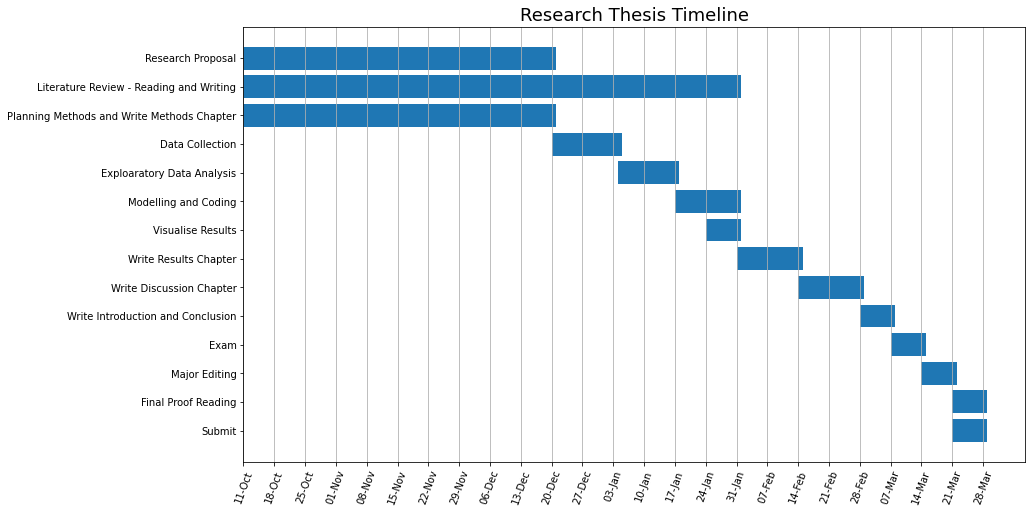

In [3]:
###### PRE-PROCESSING THE DATA ###### 
#Convert dates to datetime format
df.start=pd.to_datetime(df.start)
df.end=pd.to_datetime(df.end)
#Add Duration
df['duration']=df.end-df.start
df.duration=df.duration.apply(lambda x: x.days+1)
#sort in ascending order of start date
df=df.sort_values(by='start', ascending=True)
#project level variables
p_start=df.start.min()
p_end=df.end.max()
p_duration=(p_end-p_start).days+1
#Add relative date
df['rel_start']=df.start.apply(lambda x: (x-p_start).days)
#Create custom x-ticks and x-tick labels
x_ticks=[i for i in range(p_duration+1)]
x_labels=[(p_start+dt.timedelta(days=i)).strftime('%d-%b') 
          for i in x_ticks]
######  PLOTTING GANTT CHART ######
plt.figure(figsize=(14,8))
plt.title('Research Thesis Timeline', size=18)
plt.barh(y=df.Task, left=df.rel_start, width=df.duration)
plt.gca().invert_yaxis()
plt.xticks(ticks=x_ticks[::7], labels=x_labels[::7], rotation=70)
plt.grid(axis='x')
plt.savefig('gantt_chart.png',dpi=300, bbox_inches = "tight", facecolor='w')
plt.show()